In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

In [2]:
# players_21 data files
players_data_path = "data/players_21.csv"

# Read the players data
df = pd.read_csv(players_data_path)

# Display the data table for preview
df.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,33,1987-06-24,170,72,Argentina,FC Barcelona,...,66+3,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,35,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,54+3,54+3,54+3,61+3
2,200389,https://sofifa.com/player/200389/jan-oblak/210002,J. Oblak,Jan Oblak,27,1993-01-07,188,87,Slovenia,Atlético Madrid,...,32+3,36+3,36+3,36+3,32+3,32+3,33+3,33+3,33+3,32+3
3,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,31,1988-08-21,184,80,Poland,FC Bayern München,...,64+3,65+3,65+3,65+3,64+3,61+3,60+3,60+3,60+3,61+3
4,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,28,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,67+3,62+3,62+3,62+3,67+3,62+3,49+3,49+3,49+3,62+3


In [3]:
# Drop missing 
#df = df.dropna()

In [4]:
# Check height and weight columns if they have the appropriate data type (should be in integers int64)
df[['height_cm', 'weight_kg']].dtypes

height_cm    int64
weight_kg    int64
dtype: object

In [4]:
# Check datatype of 'joined' column
df['joined'].dtypes

dtype('O')

In [5]:
# Convert 'joined' column into datatime, 
df['joined'] = pd.to_datetime(df['joined'], errors='coerce')

# then extract the year, month, and day into 3 separate cols
df['joined_year'] = df['joined'].dt.year
df['joined_month'] = df['joined'].dt.month
df['joined_day'] = df['joined'].dt.day

# Display the results
df[['joined', 'joined_year', 'joined_month', 'joined_day']].head()

,joined,joined_year,joined_month,joined_day
0,2004-07-01,2004.0,7.0,1.0
1,2018-07-10,2018.0,7.0,10.0
2,2014-07-16,2014.0,7.0,16.0
3,2014-07-01,2014.0,7.0,1.0
4,2017-08-03,2017.0,8.0,3.0


In [6]:
# Check datatype of 'value, wage, release clause' cols
df[['value_eur', 'wage_eur', 'release_clause_eur']].dtypes

value_eur               int64
wage_eur                int64
release_clause_eur    float64
dtype: object

In [7]:
# Convert float to int
df['release_clause_eur'] = df['release_clause_eur'].fillna(0).astype(int)

# Verify the change
df[['release_clause_eur']].dtypes

release_clause_eur    int64
dtype: object

In [8]:
# Display the results of the 3 cols
df[['value_eur', 'wage_eur', 'release_clause_eur']].head()

,value_eur,wage_eur,release_clause_eur
0,67500000,560000,138400000
1,46000000,220000,75900000
2,75000000,125000,159400000
3,80000000,240000,132000000
4,90000000,270000,166500000


In [9]:
df['contract_valid_until'].dtypes

dtype('float64')

In [10]:
# Convert to int
df['contract_valid_until'] = df['contract_valid_until'].fillna(0).astype(int)

In [11]:
# Check if there's missing values in the dataset
missing_values = df.isnull().sum()
missing_values

sofifa_id         0
player_url        0
short_name        0
long_name         0
age               0
               ... 
rcb               0
rb                0
joined_year     983
joined_month    983
joined_day      983
Length: 109, dtype: int64

## Physical Factors vs Performance
- How do Weight and Age affect Soccer players performance?

In [14]:
# Create a data frame for weight and overall performance for each player
df_weight = df.set_index('short_name')[['weight_kg', 'overall']]
df_weight

,weight_kg,overall
short_name,,
L. Messi,72,93
Cristiano Ronaldo,83,92
J. Oblak,87,91
R. Lewandowski,80,91
Neymar Jr,68,91
...,...,...
K. Angulo,73,47
Zhang Mengxuan,70,47
Wang Zhenghao,74,47


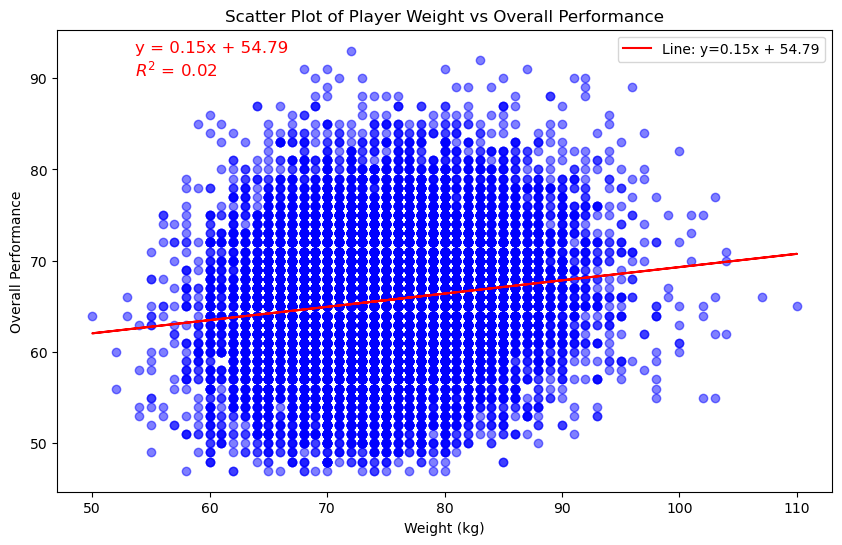

In [13]:
# Create a scatter plot for 'weight_kg' vs 'overall performance'
plt.figure(figsize=(10, 6))
plt.scatter(df_weight['weight_kg'], df_weight['overall'], color='blue', alpha=0.5)

plt.xlabel('Weight (kg)')
plt.ylabel('Overall Performance')
plt.title('Scatter Plot of Player Weight vs Overall Performance')

#Draw a Regression line
slope, intercept, r_value, p_value, std_err = linregress(df_weight['weight_kg'], df_weight['overall'])
regression_line = slope * df_weight['weight_kg'] + intercept
plt.plot(df_weight['weight_kg'], regression_line, color='red', label=f'Line: y={slope:.2f}x + {intercept:.2f}')

plt.text(0.1, 0.9, f'y = {slope:.2f}x + {intercept:.2f}\n$R^2$ = {r_value**2:.2f}', 
         transform=plt.gca().transAxes, color='red', fontsize=12)
plt.legend()
plt.show()

In [14]:
plt.savefig('weight_scatter_plot.png')

<Figure size 640x480 with 0 Axes>

In [15]:
# Create a data frame for age and overall performance for each player
df_age = df.set_index('short_name')[['age', 'overall']]
df_age

,age,overall
short_name,,
L. Messi,33,93
Cristiano Ronaldo,35,92
J. Oblak,27,91
R. Lewandowski,31,91
Neymar Jr,28,91
...,...,...
K. Angulo,24,47
Zhang Mengxuan,21,47
Wang Zhenghao,20,47


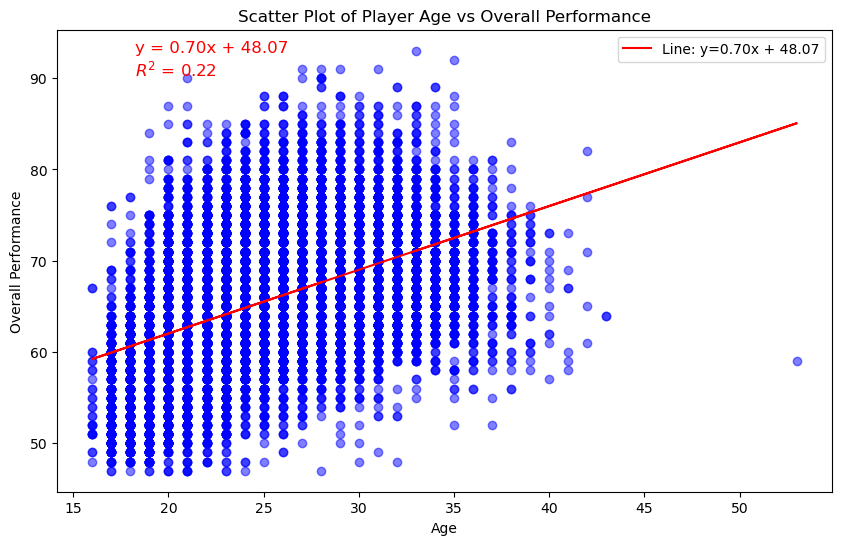

In [16]:
# Create a scatter plot for 'age' vs 'overall performance'
plt.figure(figsize=(10, 6))
plt.scatter(df_age['age'], df_age['overall'], color='blue', alpha=0.5)

plt.xlabel('Age')
plt.ylabel('Overall Performance')
plt.title('Scatter Plot of Player Age vs Overall Performance')

#Draw a Regression line
slope, intercept, r_value, p_value, std_err = linregress(df_age['age'], df_age['overall'])
regression_line = slope * df_age['age'] + intercept
plt.plot(df_age['age'], regression_line, color='red', label=f'Line: y={slope:.2f}x + {intercept:.2f}')

plt.text(0.1, 0.9, f'y = {slope:.2f}x + {intercept:.2f}\n$R^2$ = {r_value**2:.2f}', 
          transform=plt.gca().transAxes, color='red', fontsize=12)
plt.legend()
plt.show()

In [17]:
plt.savefig('weight_scatter_plot.png')

<Figure size 640x480 with 0 Axes>

In [18]:
#Find mean, median and mode for Weight:
Wmean = np.mean(df_weight['weight_kg'])
Wmedian = np.median(df_weight['weight_kg'])
Wmode = st.mode(df_weight['weight_kg'])
print(f"mean = {Wmean}")
print(f"median = {Wmedian}")
print(f"mode = {Wmode}")

mean = 75.01689189189189
median = 75.0
mode = ModeResult(mode=70, count=1510)


<function matplotlib.pyplot.show(close=None, block=None)>

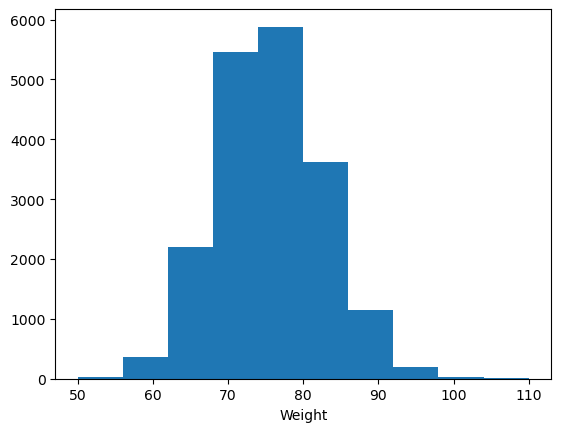

In [19]:
#Create a histogram to visualize the data
plt.hist(df_weight['weight_kg'])
plt.xlabel('Weight')
plt.show

In [20]:
plt.savefig('weight_histogram.png')

<Figure size 640x480 with 0 Axes>

In [21]:
#Test for normality
print(st.normaltest(df_weight['weight_kg'].sample(500)))

NormaltestResult(statistic=12.044524341213188, pvalue=0.0024241794800126657)


In [22]:
#Calculate Variance and Stantard Deviation for Weight
WVariance = np.var(df_weight['weight_kg'])
Wstd = np.std(df_weight['weight_kg'])
print(f"Variance: {WVariance}, Standard Deviation: {Wstd}")

Variance: 49.800601488312644, Standard Deviation: 7.056954122588062


In [23]:
#Find the Standard deviations distribution along the weight curve
wstd_minus_1 = round(Wmean - Wstd,3)
wstd_minus_2 = round(Wmean - 2 * Wstd,3)
wstd_minus_3 = round(Wmean - 3 * Wstd,3)
wstd_plus_1 = round(Wmean + Wstd,3)
wstd_plus_2 = round(Wmean + 2 * Wstd,3)
wstd_plus_3 = round(Wmean + 3 * Wstd,3)
print("std-1:", wstd_minus_1)
print("std-2:", wstd_minus_2)
print("std-3:", wstd_minus_3)
print("std+1:", wstd_plus_1)
print("std+2:", wstd_plus_2)
print("std+3:", wstd_plus_3)

std-1: 67.96
std-2: 60.903
std-3: 53.846
std+1: 82.074
std+2: 89.131
std+3: 96.188


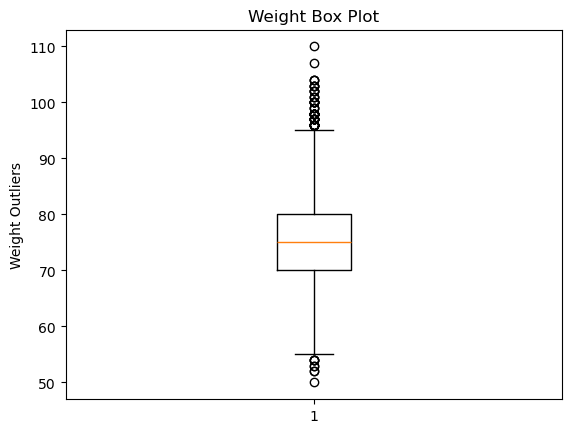

In [24]:
#Graph a Weight Box Plot to visually identify outliers
weight_sample = df_weight['weight_kg']
fig1, ax1 = plt.subplots()
ax1.set_title('Weight Box Plot')
ax1.set_ylabel('Weight Outliers')
ax1.boxplot(weight_sample)
plt.show()

In [25]:
plt.savefig('weight_boxplot.png')

<Figure size 640x480 with 0 Axes>

In [26]:
#Identify Outliers:

Wquartiles = df_weight['weight_kg'].quantile([.25,.5,.75])
Wlowerq = Wquartiles[.25]
Wmedian = Wquartiles[.5]
Wupperq = Wquartiles[.75]
print(f"Lower Quartile: {Wlowerq}, Median: {Wmedian}, Upper Quartile: {Wupperq}")
weight_IQR = Wupperq - Wlowerq
print(f"Weight IQR: {weight_IQR}")
w_lower_bound = Wlowerq - 1.5 * weight_IQR
w_upper_bound = Wupperq + 1.5 * weight_IQR
print(f"Weight Lower Bound: {w_lower_bound}, Weight Upper bound: {w_upper_bound}")

Lower Quartile: 70.0, Median: 75.0, Upper Quartile: 80.0
Weight IQR: 10.0
Weight Lower Bound: 55.0, Weight Upper bound: 95.0


In [27]:
#Maximum weight
df_weight['weight_kg'].max()

110

In [28]:
#Minimum weight
df_weight['weight_kg'].min()

50

In [29]:
#Find mean, median and mode for Age:
Amean = np.mean(df_age['age'])
Amedian = np.median(df_age['age'])
Amode = st.mode(df_age['age'])
print(f"mean = {Amean}")
print(f"median = {Amedian}")
print(f"mode = {Amode}")

mean = 25.22582347972973
median = 25.0
mode = ModeResult(mode=23, count=1473)


<function matplotlib.pyplot.show(close=None, block=None)>

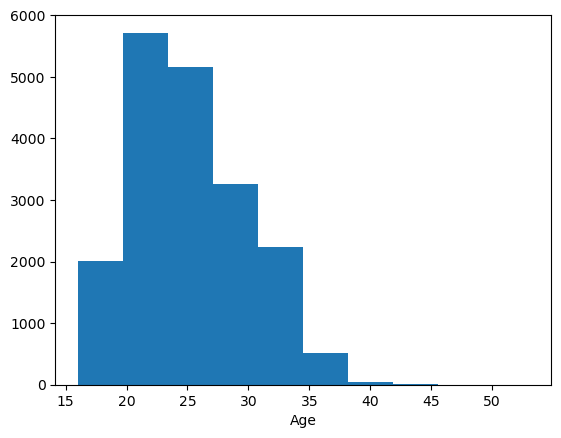

In [30]:
#Create a histogram to visualize the data
plt.hist(df_age['age'])
plt.xlabel('Age')
plt.show

In [31]:
plt.savefig('age_histogram.png')

<Figure size 640x480 with 0 Axes>

In [32]:
#Test for normality
print(st.normaltest(df_age['age'].sample(500)))

NormaltestResult(statistic=23.996802636413065, pvalue=6.1540428495766395e-06)


In [33]:
#Calculate Variance and Stantard Deviation for Weight
AVariance = np.var(df_age['age'])
Astd = np.std(df_age['age'])
print(f"Variance: {AVariance}, Standard Deviation: {Astd}")

Variance: 22.063974195191946, Standard Deviation: 4.697230481378569


In [34]:
#Find the Standard deviations distribution along the  age curve
astd_minus_1 = round(Amean - Astd,3)
astd_minus_2 = round(Amean - 2 * Astd,3)
astd_minus_3 = round(Amean - 3 * Astd,3)
astd_plus_1 = round(Amean + Astd,3)
astd_plus_2 = round(Amean + 2 * Astd,3)
astd_plus_3 = round(Amean + 3 * Astd,3)
print("std-1:", astd_minus_1)
print("std-2:", astd_minus_2)
print("std-3:", astd_minus_3)
print("std+1:", astd_plus_1)
print("std+2:", astd_plus_2)
print("std+3:", astd_plus_3)

std-1: 20.529
std-2: 15.831
std-3: 11.134
std+1: 29.923
std+2: 34.62
std+3: 39.318


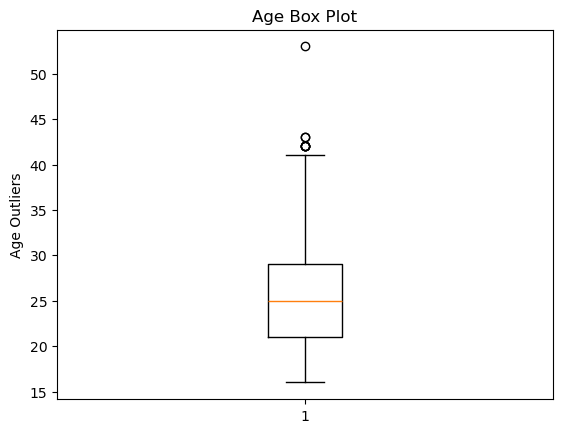

In [35]:
#Graph an Age Box Plot to visually identify outliers
age_sample = df_age['age']
fig1, ax1 = plt.subplots()
ax1.set_title('Age Box Plot')
ax1.set_ylabel('Age Outliers')
ax1.boxplot(age_sample)
plt.show()

In [36]:
plt.savefig('age_boxplot.png')

<Figure size 640x480 with 0 Axes>

In [37]:
#Identify Outliers:

Aquartiles = df_age['age'].quantile([.25,.5,.75])
Alowerq = Aquartiles[.25]
Amedian = Aquartiles[.5]
Aupperq = Aquartiles[.75]
print(f"Lower Quartile: {Alowerq}, Median: {Amedian}, Upper Quartile: {Aupperq}")
age_IQR = Aupperq - Alowerq
print(f"Age IQR: {age_IQR}")
a_lower_bound = Alowerq - 1.5 * age_IQR
a_upper_bound = Aupperq + 1.5 * age_IQR
print(f"Age Lower Bound: {a_lower_bound}, Age Upper bound: {a_upper_bound}")

Lower Quartile: 21.0, Median: 25.0, Upper Quartile: 29.0
Age IQR: 8.0
Age Lower Bound: 9.0, Age Upper bound: 41.0


In [38]:
#Maximum age
df_age['age'].max()

53

In [39]:
#Minimum age
df_age['age'].min()

16

In [ ]:
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Perform Tukey's HSD test
tukey = pairwise_tukeyhsd(endog=df['overall'],    
                          groups=df['work_rate'],  
                          alpha=0.05)            

# Display the test results
print(tukey)


In [ ]:
# Create a new column 'contract length' as the difference between 'contract_valid_until' and 'joined_year'
contract_df = df[['overall', 'joined_year', 'contract_valid_until']].copy()
contract_df['contract length'] = (contract_df['contract_valid_until'] - contract_df['joined_year'] + 1)
contract_df_clean = contract_df.dropna()

In [ ]:
#Calculate the Analysis
minimum_2 = contract_df_clean['contract length'].min()
Q1_2 = contract_df_clean['contract length'].quantile(0.25)
median_2 = contract_df_clean['contract length'].median()
Q3_2 = contract_df_clean['contract length'].quantile(0.75)
maximum_2 = contract_df_clean['contract length'].max()

#Create a dictionary for the DFs

analysis_of_contract = {
    'Minimum': minimum_2,
    'Q1 (25th Percentile)': Q1_2,
    'Median (50th Percentile)': median_2,
    'Q3 (75th Percentile)': Q3_2,
    'Maximum': maximum_2
}

# Create a DataFrame from the dictionary
analysis_of_contract_df = pd.DataFrame(analysis_of_contract, index=[0])

# Display the DataFrame
display(analysis_of_contract_df)


In [ ]:
plt.boxplot(contract_df_clean['contract length'])  

# Add titles and labels
plt.title('Box Plot of Contract Length')
plt.xlabel('Contract Length')

# Show the plot
plt.show()

In [ ]:
# Ensure there are no NaN values in the cleaned DataFrame
contract_clean_df = contract_df_clean.dropna(subset=['contract length', 'overall'])

# Define the variables for regression
contract_length = contract_clean_df['contract length']  
overall_performance = contract_clean_df['overall']

# Perform linear regression
slope, intercept, r_value, p_value, std_err = st.linregress(contract_length, overall_performance)

# Create regression line values
regress_values = slope * contract_length + intercept

# Create equation line for annotation
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

# Create correlation coefficient string
correlation_eq = f"R = {round(r_value, 2)}"

# Step 6: Graph
plt.scatter(contract_length, overall_performance, label='Data Points')
plt.plot(contract_length, regress_values, 'r-', label='Regression Line')
plt.title('Contract Length vs. Overall Performance')
plt.xlabel('Contract Length')
plt.ylabel('Overall Performance')
plt.legend()

# Annotate the equation and correlation on the graph
plt.annotate(line_eq, (0.05, 0.85), fontsize=12, color='red', xycoords='axes fraction')
plt.annotate(correlation_eq, (0.05, 0.80), fontsize=12, color='blue', xycoords='axes fraction')

# Show the plot
plt.show()

# Print R-squared value
print(f"R²: {r_value**2}")



